In [1]:
__nbid__ = '0070'
__author__ = 'Isabella Olin <iolin@arizona.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['sdss_dr17','sdss_dr16']
__keywords__ = ['extragalactic', 'galaxies','quenching','spectra','spectra stacking']

# Catálogo de Estructura a Gran Escala de SDSS/BOSS y Cosmic Slime
por Isabella Olin (University of Arizona), Stéphanie Juneau (NSF NOIRLab) y el Equipo de Astro Data Lab

#### (_Traducción de [LargeScaleStructureSdssCosmicSlime.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/LargeScaleStructure/LargeScaleStructureSdssCosmicSlime.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Consulta al catálogo SDSS](#query1)
* [Consulta al Catálogo Cosmic Slime](#query2)
* [Graficar resultados de las consultas](#plots)
* [Cúmulo de Coma](#coma)
* [Espectros del Cúmulo de Coma](#spectra)
* [Referencias](#references)

<a class="anchor" id="goals"></a>
# Objetivos
* Comparar la cobertura en el cielo y la distribución en corrimiento al rojo de los catálogos SDSS SpecObj y Cosmic Slime Value-Added Catalog (VAC)
* Graficar la posición en el cielo de los objetos dentro y alrededor del Cúmulo de Coma, codificada por colores según la densidad de materia del VAC Cosmic Slime
* Comparar la densidad de materia del Cúmulo de Coma con la del campo a la misma distancia (mismo corrimiento al rojo)
* Crear contornos de densidad de materia en el Cúmulo de Coma
* Investigar espectros de SDSS para buscar signos de apagado de formación estelar dependiente del entorno.

# Resumen

Al observar galaxias del Universo temprano y aquellas más cercanas, notamos una tendencia: con el tiempo, las galaxias dejan de formar estrellas; se apagan. Lo que aún estamos tratando de entender es por qué. ¿Cuáles son los mecanismos astrofísicos que causan esta tendencia de galaxias pasivas?  
En este notebook, exploramos la densidad de materia en el Cúmulo de Coma usando el Cosmic Slime Value-Added Catalog para investigar la relación entre el entorno y el apagado de galaxias. Comenzamos comparando la cobertura en el cielo entre SDSS y Cosmic Slime y sus distribuciones de corrimiento al rojo. Aquí notamos que los datos de Cosmic Slime son escasos más allá de z = 0.1, por lo que decidimos centrarnos en este rango bajo de corrimiento al rojo.  
Luego seleccionamos una región centrada en el Cúmulo de Coma como ubicación ideal para explorar una amplia gama de entornos, alcanzando altas densidades. Al crear contornos de densidad de materia, podemos visualizar la distribución de materia en el cúmulo. Después examinamos espectros de galaxias del SDSS, ordenados por su densidad de materia local, para buscar signos de apagado dependiente del entorno.  

La **Monte Carlo Physarum Machine (MCPM)** fue desarrollada para modelar la red optimizada del moho mucilaginoso *Physarum polycephalum*. Aplicada a las galaxias, la MCPM traza un campo de densidad de materia que revela la estructura filamentaria del Universo. Este campo de densidad fue muestreado en la ubicación de las galaxias de SDSS para crear el Cosmic Slime Value-Added Catalog ([Elek et al. 2020](https://direct.mit.edu/artl/article/28/1/22/108680/Monte-Carlo-Physarum-Machine-Characteristics-of), [Wilde et al. 2023](https://ui.adsabs.harvard.edu/abs/2023arXiv230102719W/abstract)).

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----

# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# Paquetes de 3ros

from getpass import getpass
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from astropy.convolution import convolve, Gaussian2DKernel
import pandas as pd

# SPARCL
from sparcl.client import SparclClient

# Data Lab
from dl import authClient as ac
from dl import queryClient as qc

In [2]:
## Configuración de gráficos

# Tamaño de fuente
font = {'size':15}
matplotlib.rc('font', **font)

# Grosor de ejes
width = {'linewidth':2.0}
matplotlib.rc('axes', **width)

# Marcas en los ejes x e y
ticks = {'major.size':8.0, 'minor.size':4.0, 'major.width':2.0, 'minor.width':1.5, 'direction':'in',\
        'minor.visible':True}
matplotlib.rc('xtick', **ticks)
matplotlib.rc('ytick', **ticks)

# Incluir marcas en los ejes superior y derecho
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [3]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="query1"></a>
# Consulta a SDSS DR17

La base de datos SDSS DR17 se llama **sdss_dr17** y también incluye varias tablas. Usaremos la tabla **specobj**, que contiene información espectroscópica.

In [3]:
# SDSS DR17 specobj; buscaremos hasta z<0.5115 para comparar con el catálogo
# Cosmic Slime y solo consideraremos galaxias (class='GALAXY')

# Escribir la consulta (SQL)
query = ("""
  SELECT z, ra, dec, specobjid 
  FROM sdss_dr17.specobj
  WHERE (z>0.0002 and z<0.5115 and class='GALAXY')
  """)

# z                 = corrimiento al rojo (z) de la tabla specObj de SDSS
# ra, dec           = AR y Dec de la fibra SDSS en la tabla specObj
# class             = Clase de fuente (Star, Galaxy, QSO) en SDSS
# specobjid         = ID único de la base de datos basado en PLATE, MJD, FIBERID, RUN2D

print(query)


  SELECT z, ra, dec, specobjid 
  FROM sdss_dr17.specobj
  WHERE (z>0.0002 and z<0.5115 and class='GALAXY')
  


In [4]:
# Llamar al cliente de consulta y devolver una tabla de Astropy
resultado = qc.query(sql=query, fmt='table')

In [5]:
# Imprimir la longitud de la tabla (número de filas) y las primeras 10 filas
print(len(resultado))
resultado[:10]

1728836


z,ra,dec,specobjid
float64,float64,float64,int64
0.12142085,328.94453,44.1721,2889138948246890496
0.14196011,329.84453,44.2721,2889117232892241920
0.20890056,329.54453,44.9721,2889111735334103040
0.019433081,331.34453,44.9721,2889065555845736448
0.5036601,330.44453,45.5721,2889201345531766784
0.31619522,330.34453,46.2721,2877959108428851200
0.35590228,353.85034,45.049945,2124639424129034240
0.025425429,354.90534,45.082045,2124597367809271808
0.060469825,355.38141,45.568003,2124601490977875968


<a class="anchor" id="query2"></a>
El catálogo Cosmic Slime Value-Added fue publicado junto con SDSS DR17 y se puede encontrar [aquí](https://www.sdss4.org/dr17/data_access/value-added-catalogs/?vac_id=cosmic-web-environmental-densities-from-mcpm-slimemold), con el modelo de datos (lista de columnas) descrito en:  
https://data.sdss.org/datamodel/files/EBOSS_LSS/mcpm/MCPM_VER/slimeMold_galaxy_catalog.html

El modelo de datos en Data Lab, tal como se usa en este notebook, se encuentra en:  
https://datalab.noirlab.edu/query.php?name=sdss_dr17.eboss_mcpm

Para aprender más sobre el catálogo Cosmic Slime Value-Added y cómo Wilde et al. optimizaron la MCPM, consulta [Wilde et al. 2023](https://ui.adsabs.harvard.edu/abs/2023arXiv230102719W/abstract).

In [6]:
# sdss_dr17.eboss_mcpm es el catálogo Cosmic Slime Value-Added
# Para recuperar espectros SDSS DR16 con SPARCL más adelante en el notebook,
# uniremos con sdss_dr16.specobjall para obtener los specobjid de DR16

# Escribir la consulta (SQL)
query = ("""
    SELECT C.ra, C.dec, C.z, C.matterdens, C.mcpm_run, S.specobjid 
    FROM sdss_dr17.eboss_mcpm as C
    JOIN sdss_dr16.specobjall as S on C.sdss_joinid = S.sdss_joinid
    """)

# ra, dec        = AR, Dec de la fibra SDSS (J2000)
# z              = mejor corrimiento al rojo
# matterdens     = log10 de la razón entre la densidad de materia y la densidad media
# mcpm_run       = índice de la muestra de galaxias ajustada simultáneamente con MCPM
# specobjid      = specobjid de DR16 para recuperar espectros desde SPARCL mediante "specid"
# sdss_joinid    = identificador SDSS basado en plate, mjd, fiberid, constante entre DRs.

print(query)


    SELECT C.ra, C.dec, C.z, C.matterdens, C.mcpm_run, S.specobjid 
    FROM sdss_dr17.eboss_mcpm as C
    JOIN sdss_dr16.specobjall as S on C.sdss_joinid = S.sdss_joinid
    


In [7]:
# Llamar al cliente de consulta y devolver una tabla de Astropy
evt_data = qc.query(sql=query, fmt='table')

In [8]:
# Imprimir la longitud de la tabla (número de filas) y las primeras 10 filas
print(len(evt_data))
evt_data[:10]

638820


ra,dec,z,matterdens,mcpm_run,specobjid
float64,float64,float64,float64,int64,int64
149.4869068955487,59.00149288161988,0.3781941,0.22516784,5,-9220861727639056384
149.4869068955487,59.00149288161988,0.3781941,0.551839,7,-9220861727639056384
146.714215072841,-1.041280023331374,0.021222278,1.7854924,0,299489677444933632
146.6285851269414,-0.7651620976591762,0.06465632,1.0360718,0,299490502078654464
146.6317064432559,-0.9883467023053,0.05265425,0.20140773,0,299491051834468352
146.9634997327016,-0.5447758299302171,0.055980586,0.8528137,0,299492701101910016
146.9635237026241,-0.7593404235056136,0.09708638,0.5238572,0,299492975979816960
146.5927838471015,-0.7602574022145185,0.064959235,1.2447993,0,299494075491444736
146.7283806728784,-0.5569743913807053,0.089311965,1.0173166,0,299494625247258624


<a class="anchor" id="plots"></a>
# Graficar resultados de las consultas

## Cobertura en el cielo: SDSS vs. Cosmic Slime

*El catálogo Slime usa surveys (subconjuntos) de SDSS y no muestra el rango completo de datos de SDSS, por lo que esperamos solo una superposición parcial en el cielo. El catálogo Slime tiene menos objetos que SDSS DR17.*

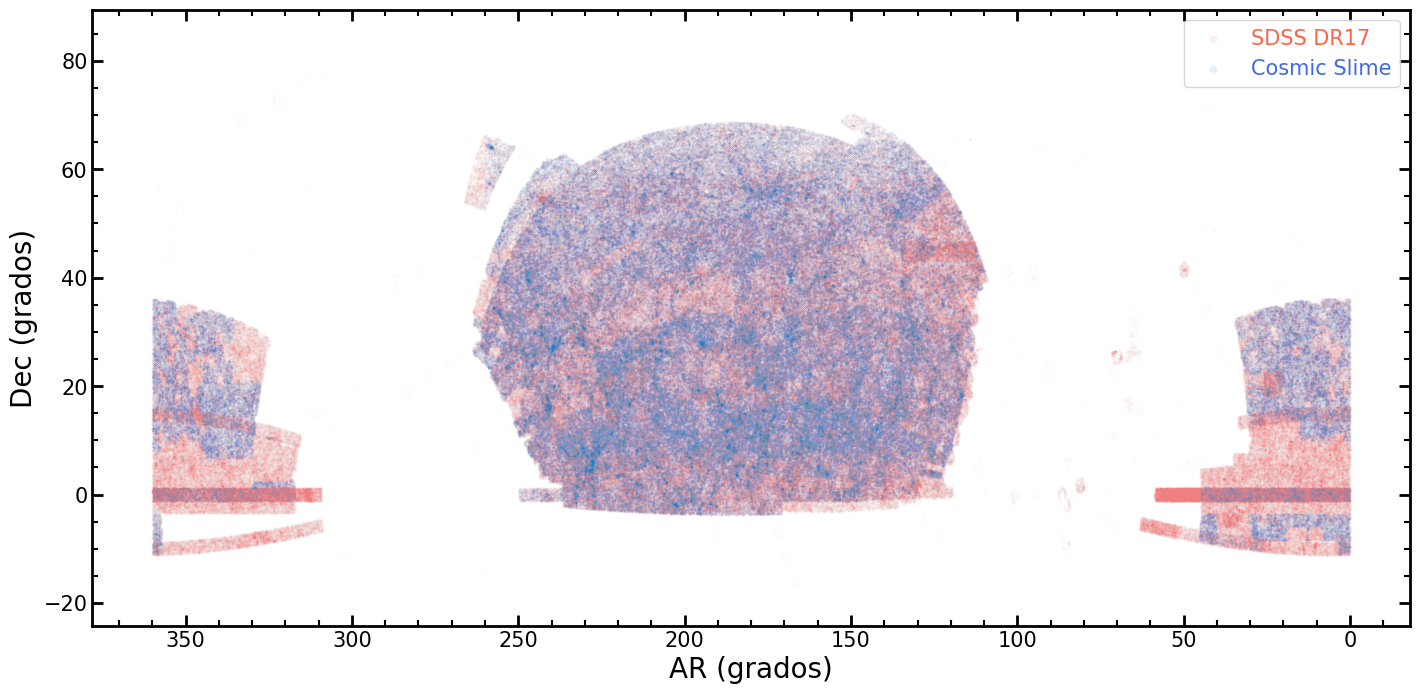

In [9]:
# Inicializar la figura para la cobertura en el cielo
fig, ax = plt.subplots(1,1,figsize=(17,8))

# Graficar puntos pequeños para objetos de los catálogos SDSS y Cosmic Slime
ax.scatter(resultado['ra'],resultado['dec'],s=0.02,color='lightcoral',marker='o',alpha=0.1, label='SDSS DR17')
ax.scatter(evt_data['ra'],evt_data['dec'],s=0.02,color='dodgerblue',marker='o',alpha=0.1, label='Cosmic Slime')

# Invertir el orden del eje horizontal para que AR aumente hacia la izquierda (Este)
ax.set_xlim(reversed(ax.set_xlim()))

# Etiquetas de ejes y leyenda
ax.set_xlabel("AR (grados)", fontsize=20)
ax.set_ylabel("Dec (grados)", fontsize=20)
# Usar colores ligeramente más darks en las etiquetas de la leyenda para mejor legibilidad
plt.legend(loc='upper right',markerscale=30, labelcolor=['tomato','royalblue'])

## Usuario: Descomenta la siguiente línea para ubicar el Cúmulo de Coma, que investigaremos más adelante
#ax.add_patch(Rectangle((190, 25),10,7,fill=False,color='white'))
# ^ nota: incluso aquí ya se puede ver el Cúmulo de Coma
plt.show()

## Distribución de corrimiento al rojo de galaxias de Cosmic Slime

El catálogo Cosmic Slime tiene una columna llamada 'mcpmRun', que indica a qué ejecución del modelo pertenece el objeto.  
Aquí graficamos la distribución de corrimientos al rojo de las fuentes, ordenadas por mcpmRun.  
Run0 son muestras del NASA Sloan Atlas y las ejecuciones de mayor corrimiento al rojo (Run1 - Run8) son Galaxias Rojas Luminosa (LRGs) muestreadas de BOSS.

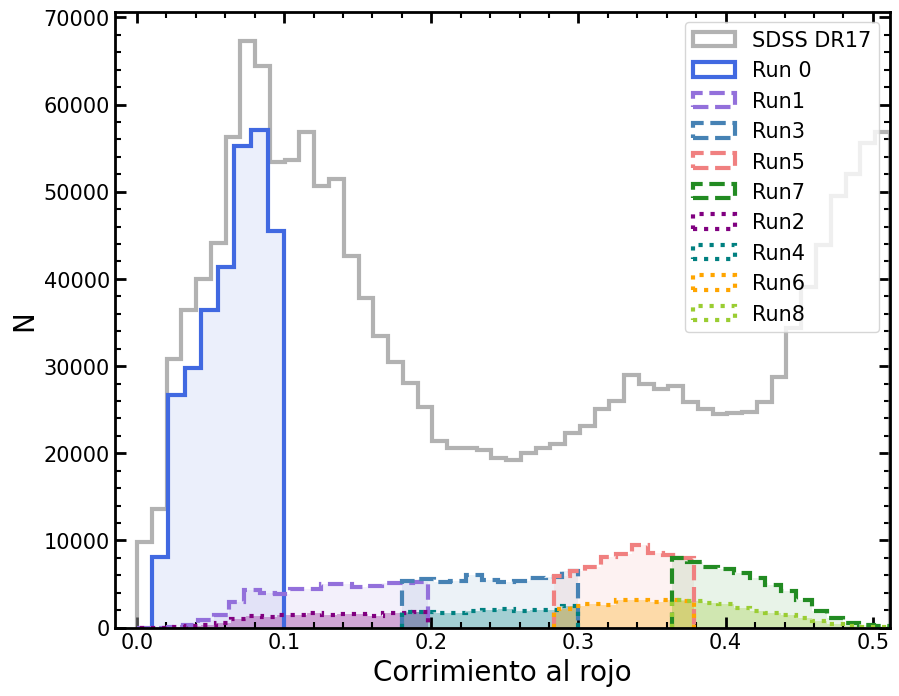

In [10]:
# Mantener tamaño de bin constante
bsize = 0.01
runs = [0,1,3,5,7,2,4,6,8]
colors = ['royalblue','mediumpurple','steelblue','lightcoral','forestgreen','purple','teal','orange','yellowgreen']

nbins_sdss = int((np.max(resultado['z']) - np.min(resultado['z']))/bsize)

fig, (ax) = plt.subplots(1, 1, figsize=(10, 8))

# Graficar distribución en corrimiento al rojo de SDSS DR16
ax.hist(resultado['z'],bins=nbins_sdss,histtype='step',color='gray',label='SDSS DR17',linewidth=3, alpha=0.6)

# Bucle sobre las ejecuciones de mcpm
for i,run_i in enumerate(runs):
    zbin = evt_data['z'][evt_data['mcpm_run'] == run_i]
    zmin = np.min(zbin)
    zmax = np.max(zbin)
    Nbins = int((zmax-zmin)/bsize)
    
    # Graficar distribución en z para Run 0 (NSA/SDSS)
    if run_i == 0:
        ax.hist(zbin,bins=Nbins,histtype='stepfilled',color=colors[i],alpha=0.1)
        ax.hist(zbin,bins=Nbins,histtype='step',color=colors[i],label='Run 0',linewidth=3)
   
    # Graficar distribución en z para Runs 1, 3, 5 y 7 (LRG-NGC)
    elif run_i%2 != 0:
        ax.hist(zbin,bins=Nbins,color=colors[i],histtype='stepfilled',alpha=0.1)
        ax.hist(zbin,bins=Nbins,color=colors[i],histtype='step',linestyle='dashed',label='Run' + str(run_i),linewidth=3)
   
    # Graficar distribución en z para Runs 2, 4, 6, 8 (LRG-SGC)
    else:
        ax.hist(zbin,bins=Nbins,color=colors[i],histtype='stepfilled',alpha=0.3)
        ax.hist(zbin,bins=Nbins,color=colors[i],histtype='step',linestyle='dotted',label='Run' + str(run_i),linewidth=3)

ax.set_xlim(-0.015,0.5115)
ax.set_xlabel('Corrimiento al rojo',fontsize=20)
ax.set_ylabel('N',fontsize=20)
plt.legend(loc='upper right')

Notamos las superposiciones entre ejecuciones de MCPM para evitar discontinuidades en el catálogo.  
En este notebook, nos centraremos en una estructura de bajo corrimiento al rojo en Run0: el Cúmulo de Coma.

In [11]:
# Conservar solo Run0 (mcpm_run = 0)
evt_data = evt_data[evt_data['mcpm_run'] == 0]

<a class="anchor" id="coma"></a>
# Cúmulo de Coma

El Cúmulo de Coma es uno de los cúmulos de galaxias masivos más estudiados del universo observable. Con más de 1,000 galaxias identificadas, es muy rico y ofrece una buena variedad de regiones de alta y baja densidad. Esto lo convierte en un buen objetivo para investigar la relación entre el entorno y el apagado de galaxias.

## Localización del Cúmulo de Coma
Para este notebook, consideraremos que los objetos del Cúmulo de Coma se encuentran en el rango de corrimiento al rojo  
0.0142 ≤ z ≤ 0.0328 ([Tiwari et al. 2020](https://ui.adsabs.harvard.edu/abs/2020NewA...8101417T/abstract); también [Rines et al. 2005](https://iopscience.iop.org/article/10.1086/433173)).

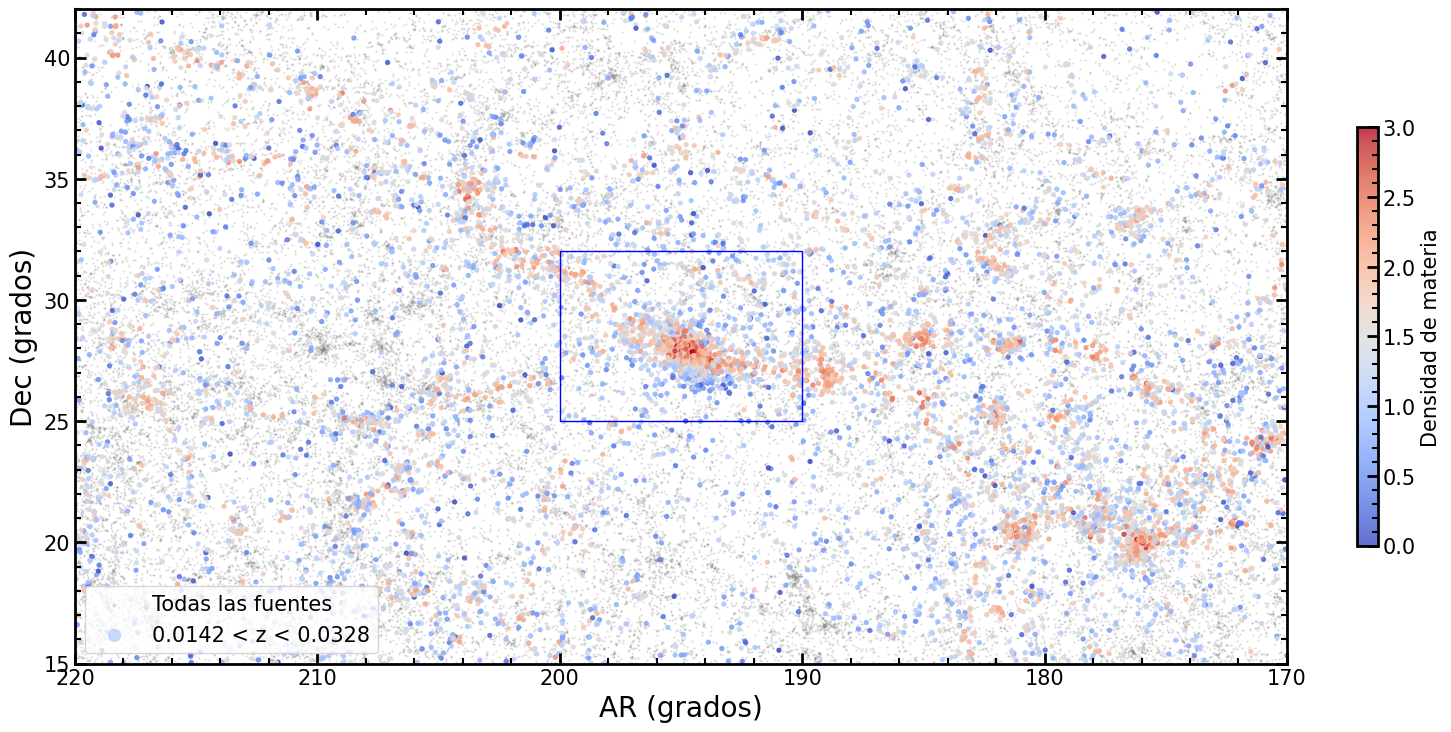

In [13]:
# Seleccionar corte de corrimiento al rojo correspondiente al Cúmulo de Coma
coma_z = (evt_data['z'] > 0.0142) & (evt_data['z'] < 0.0328)

# Enmascarar ubicación del Cúmulo de Coma
coma_ra = (evt_data['ra'] > 190) & (evt_data['ra'] < 200)
coma_dec = (evt_data['dec'] > 25) & (evt_data['dec'] < 32)
coma_ra_large = (evt_data['ra'] > 170) & (evt_data['ra'] < 220)
coma_dec_large = (evt_data['dec'] > 15) & (evt_data['dec'] < 42)

# Inicializar la figura
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 8.5))

# Graficar todos los puntos en gris (todos los corrimientos al rojo)
ax1.scatter(evt_data['ra'][coma_ra_large&coma_dec_large],evt_data['dec'][coma_ra_large&coma_dec_large],s=0.5,color='gray',marker='o',alpha=0.2,label='Todas las fuentes')

# Sobreponer objetos del corte de corrimiento al rojo por su densidad de materia
im = ax1.scatter(evt_data['ra'][coma_ra_large&coma_dec_large&coma_z],evt_data['dec'][coma_ra_large&coma_dec_large&coma_z],s=8,c=evt_data['matterdens'][coma_ra_large&coma_dec_large&coma_z],
                 norm = 'linear',vmin=0,vmax=3,marker='o',alpha=0.8,cmap='coolwarm',label = '0.0142 < z < 0.0328')

# Extensión de AR, Dec (en grados) para graficar
xmin = 170.
xmax = 220.
ymin = 15.
ymax = 42.

ax1.axis([xmin, xmax, ymin, ymax])
ax1.set_xlim(reversed(ax1.set_xlim())) # Invertir el eje x
ax1.set_xlabel("AR (grados)", fontsize=20)
ax1.set_ylabel("Dec (grados)", fontsize=20)
ax1.set_aspect('equal')

# Agregar rectángulo para mostrar dónde haremos zoom en la siguiente celda
ax1.add_patch(Rectangle((190, 25),10,7,fill=False,color='b'))
ax1.legend(loc = 'lower left', markerscale=3)

cb = fig.colorbar(im,label='Densidad de materia',fraction = 0.015, orientation='vertical')
plt.show()

El panel anterior muestra objetos del Catálogo Cosmic Slime en una región amplia alrededor del Cúmulo de Coma.  
Aquí mostramos en gris los objetivos en todos los corrimientos al rojo y en color, mapeados por densidad de materia, los objetivos en el rango de corrimiento al rojo del Cúmulo de Coma.  
Podemos identificar fácilmente el Cúmulo de Coma, así como posibles cúmulos más pequeños y estructuras filamentosas.  
El rectángulo azul indica una región seleccionada en la que haremos zoom en la siguiente celda.  

## Una mirada más cercana

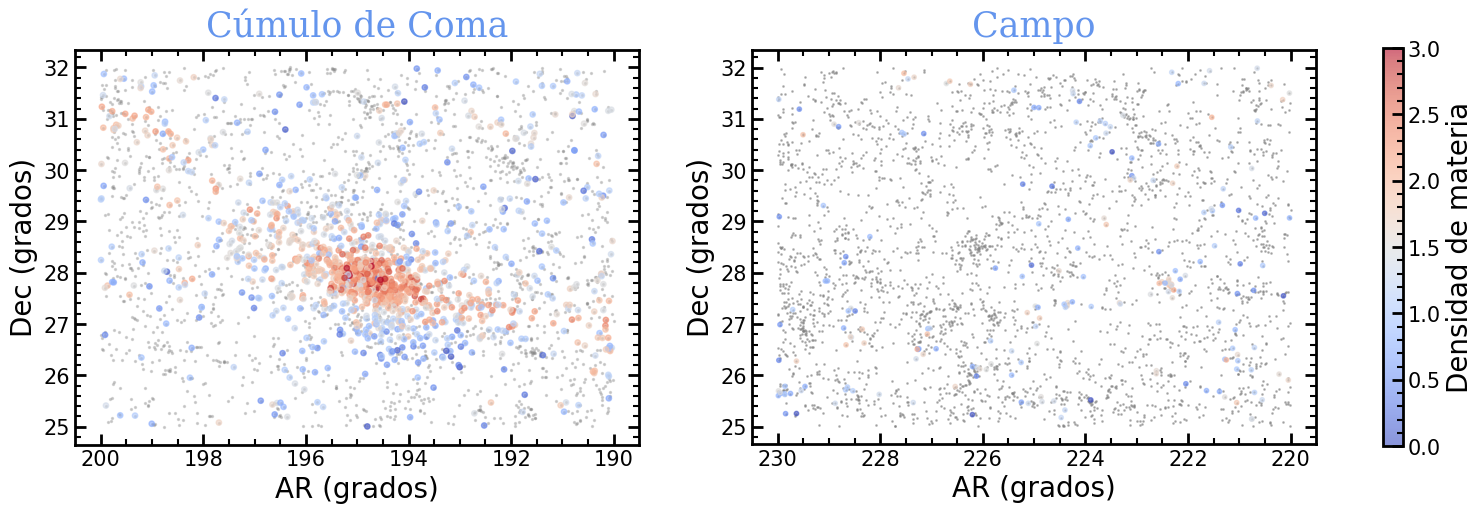

In [14]:
# Enmascarar área para comparar el Cúmulo de Coma con una región de Campo de control (mismo tamaño angular y Dec)
control_ra = (evt_data['ra'] > 220) & (evt_data['ra'] < 230)
control_dec = (evt_data['dec'] > 25) & (evt_data['dec'] < 32)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6.5))
plt.subplots_adjust(right=1.01)

# Graficar todos los puntos en gris (todos los corrimientos al rojo, RA y Dec del Cúmulo de Coma) 
ax1.scatter(evt_data['ra'][coma_ra&coma_dec],evt_data['dec'][coma_ra&coma_dec],s=2,color='gray',marker='o',alpha=0.3)

# Sobreponer objetos del corte de corrimiento al rojo por su densidad de materia (AR y Dec del Cúmulo de Coma)
im1 = ax1.scatter(evt_data['ra'][coma_ra&coma_dec&coma_z],evt_data['dec'][coma_ra&coma_dec&coma_z],s=15,c=evt_data['matterdens'][coma_ra&coma_dec&coma_z],cmap = 'coolwarm', 
                  norm = 'linear',vmin=0,vmax=3,marker='o',alpha=0.6)
ax1.set_xlim(reversed(ax1.set_xlim()))
ax1.set_xlabel("AR (grados)", fontsize=20)
ax1.set_ylabel("Dec (grados)", fontsize=20)
ax1.text(195,32.8,'Cúmulo de Coma',ha='center',va = 'center',fontsize=25,color='cornflowerblue',family='serif')
ax1.set_aspect('equal')

# Graficar todos los puntos en gris (todos los corrimientos al rojo, región de Campo de control)
ax2.scatter(evt_data['ra'][control_ra&control_dec],evt_data['dec'][control_ra&control_dec],s=1,color='gray',marker='o',alpha=0.5)

# Sobreponer objetos del corte de corrimiento al rojo por su densidad de materia (Campo)
im2 = ax2.scatter(evt_data['ra'][control_ra&control_dec&coma_z],evt_data['dec'][control_ra&control_dec&coma_z],s=10,c=evt_data['matterdens'][control_ra&control_dec&coma_z],cmap = 'coolwarm',
                  norm = 'linear',vmin=0,vmax=3,marker='o',alpha=0.6)

ax2.set_xlim(reversed(ax2.set_xlim()))
ax2.set_xlabel("AR (grados)", fontsize=20)
ax2.set_ylabel("Dec (grados)", fontsize=20)
ax2.text(225,32.8,'Campo',ha='center',va = 'center',fontsize=25,color='cornflowerblue',family='serif')
ax2.set_aspect('equal')

# Barra de color
cb = fig.colorbar(im2,ax=(ax1,ax2),fraction = 0.015, orientation='vertical').set_label(label="Densidad de materia",size=20);

Las dos figuras anteriores muestran regiones más pequeñas del cielo, acercándonos al Cúmulo de Coma y a una región de campo a la misma declinación y corrimiento al rojo.  
Como era de esperarse, la densidad de materia del Cúmulo de Coma es mayor en su centro.  
Podemos explorar más a fondo la distribución de densidad de materia en el Cúmulo de Coma visualizando líneas de contorno.

## Contornos de densidad de materia

In [16]:
# Área de máscara para contornos 
coma_ra_small = (evt_data['ra'] > 194.4) & (evt_data['ra'] < 195.6)
coma_dec_small = (evt_data['dec'] > 27.4) & (evt_data['dec'] < 28.5)

# Inicializar kernel gaussiano
gauss_kernel = Gaussian2DKernel(2)

# Crear histograma 2D no ponderado de AR y Dec del Cúmulo de Coma
dens_1, _, _ = np.histogram2d((evt_data['ra'][coma_ra_small&coma_dec_small&coma_z]), (evt_data['dec'][coma_ra_small&coma_dec_small&coma_z]),range=[[194.4,195.6],[27.4,28.5]], bins=35)
dens_1 = convolve(dens_1, gauss_kernel)
dens_1 = dens_1.T

# Crear histograma 2D de AR y Dec del Cúmulo de Coma ponderado por densidad de materia
dens_2, _, _ = np.histogram2d((evt_data['ra'][coma_ra_small&coma_dec_small&coma_z]), (evt_data['dec'][coma_ra_small&coma_dec_small&coma_z]),range=[[194.4,195.6],[27.4,28.5]], bins=35, 
                            weights=10**(evt_data['matterdens'][coma_ra_small&coma_dec_small&coma_z]))
dens_2 = convolve(dens_2, gauss_kernel)
dens_2 = dens_2.T

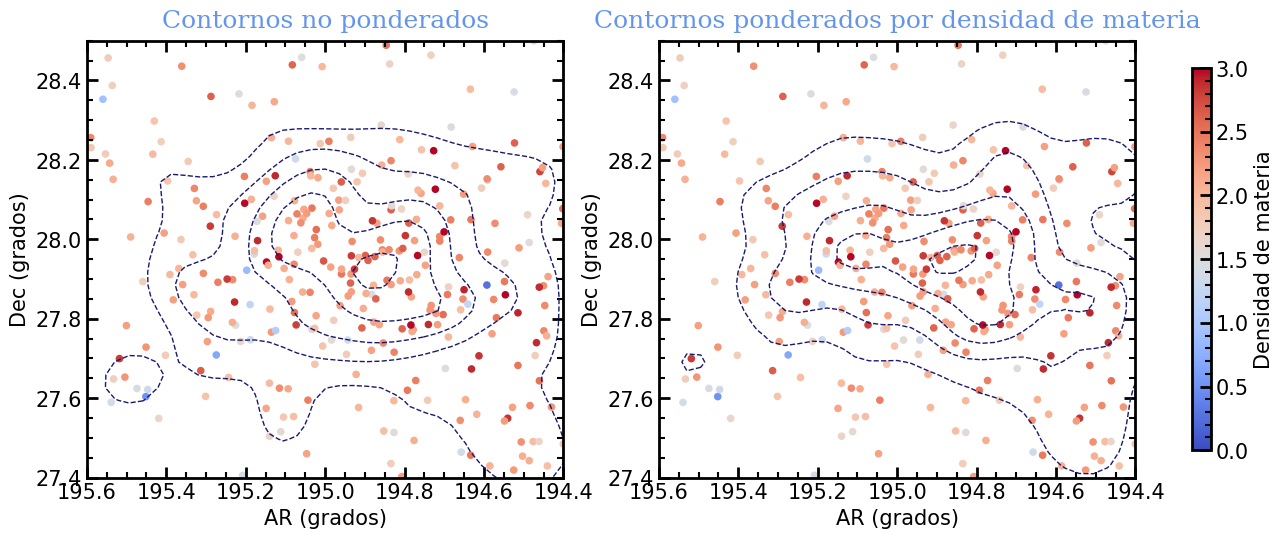

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14.5,6.5))
                          
# Graficar objetos en el Cúmulo de Coma por su densidad de materia
im1 = ax1.scatter(evt_data['ra'][coma_ra_small&coma_dec_small&coma_z],evt_data['dec'][coma_ra_small&coma_dec_small&coma_z],c=evt_data['matterdens'][coma_ra_small&coma_dec_small&coma_z],
                  cmap = 'coolwarm', norm = 'linear', vmin=0,vmax=3, marker='o',s=20,alpha=1)

# Superponer contornos no ponderados
cntra1 = ax1.contour(dens_1, colors = 'midnightblue',linestyles='dashed', linewidths=1, extent=(194.4,195.6,27.4,28.5),levels=[0.2,0.34,0.48,0.62,0.76])

ax1.set_xlim(reversed(ax1.set_xlim()))
ax1.set_xlabel("AR (grados)", fontsize=15)
ax1.set_ylabel("Dec (grados)", fontsize=15)
ax1.text(195,28.55,'Contornos no ponderados',ha='center',va = 'center',fontsize=18,color='cornflowerblue',family='serif')
ax1.set_aspect('equal')

# Graficar objetos en el Cúmulo de Coma por su densidad de materia
im2 = ax2.scatter(evt_data['ra'][coma_ra_small&coma_dec_small&coma_z],evt_data['dec'][coma_ra_small&coma_dec_small&coma_z],c=evt_data['matterdens'][coma_ra_small&coma_dec_small&coma_z],
                  cmap = 'coolwarm', norm = 'linear',vmin=0,vmax=3,marker='o',s=20,alpha=1)

# Superponer contornos ponderados por densidad de materia
cntra2 = ax2.contour(dens_2, colors = 'midnightblue',linestyles='dashed', linewidths=1, extent=(194.4,195.6,27.4,28.5),levels=[40,85,130,175,220])

ax2.set_xlim(reversed(ax2.set_xlim()))
ax2.set_xlabel("AR (grados)", fontsize=15)
ax2.set_ylabel("Dec (grados)", fontsize=15)
ax2.text(195,28.55,'Contornos ponderados por densidad de materia',ha='center',va = 'center',fontsize=18,color='cornflowerblue',family='serif')
ax2.set_aspect('equal')

cb = plt.colorbar(im1,ax = (ax1,ax2),label='Densidad de materia',fraction=0.017)

Ambos paneles grafican objetivos en el Cúmulo de Coma coloreados según su densidad de materia.  
El panel izquierdo muestra contornos que no consideran la densidad de materia, solo la densidad numérica de objetos.  
El gráfico de la derecha muestra contornos ponderados por su densidad de materia, en una escala lineal.  
Como estos pesos no producen los mismos contornos, sabemos que hay información adicional más allá de la densidad numérica.  
Las estimaciones de *densidad de materia* pueden proporcionar una imagen más precisa de la estructura de un cúmulo.

<a class="anchor" id="spectra"></a>
# Espectros del Cúmulo de Coma

A continuación, recuperaremos espectros SDSS con [SPARCL](https://astrosparcl.datalab.noirlab.edu/).  
Estas figuras muestran los espectros apilados de nuestras celdas:  
Cada espectro es el promedio de la luz combinada de todas las estrellas en galaxias agrupadas por entornos similares (densidad de materia circundante).  
Al examinar trazadores espectrales de formación estelar y edades de poblaciones estelares, analizamos los espectros promedio para un entorno dado y encontrar tendencias de apagado de formación estelar en galaxias.

In [20]:
# Instanciar el cliente SPARCL para recuperar espectros a continuación
client = SparclClient()

### Funciones para acceder y apilar espectros SDSS

add_lines() y stack_specta() se adaptaron de notebooks-latest/03_ScienceExamples/EmLineGalaxies/01_EmLineGalaxies_SpectraStack.ipynb

In [21]:
def add_lines(z, ax = None, rest_frame = True, em_label = True, abs_label = True, em_lines = None, abs_lines = None):
    """
    Función para agregar líneas de emisión y/o absorción a una gráfica. 
    
    Si se proporciona em_lines o abs_lines, se grafican únicamente las líneas especificadas.
    Si no se proporciona ninguna línea, se grafican todas las líneas que estén presentes en el rango en x de la gráfica.
    
    Parámetros
    ----------
    z : float
        Valor del corrimiento al rojo de la fuente
    
    ax : AxesSubplot
        El eje en el que se deben graficar las líneas de emisión/absorción.
        Si ax = None, entonces la función de graficado usa plt en lugar de un eje.
        
    rest_frame : bool
        Indica si la gráfica está en el marco de reposo. El valor predeterminado es True.
    
    em_label : bool
        Indica si se etiquetan las líneas de emisión. El valor predeterminado es True.
        
    abs_label : bool
        Indica si se etiquetan las líneas de absorción. El valor predeterminado es True.
    
    em_lines : list
        Lista de líneas de emisión a etiquetar.
    
    abs_lines : list
        Lista de líneas de absorción a etiquetar.
    
    Retorna
    -------
    None
    
    """
    
    # Lista de líneas
    # Este es el conjunto de líneas de emisión de los archivos spZline. 
    # Todas las longitudes de onda están en vacío.

    # Líneas de emisión
    emission_lines = [
    {"name" : "Ly-alpha",       "lambda" : 1215.67,  "emission": True,  "label" : "Ly$\\alpha$"},
    {"name" : "N V 1240",       "lambda" : 1240.81,  "emission": True,  "label" : "N V"},
    {"name" : "C IV 1549",      "lambda" : 1549.48,  "emission": True,  "label" : "C IV" },
    {"name" : "He II 1640",     "lambda" : 1640.42,  "emission": True,  "label" : "He II"},
    {"name" : "C III] 1908",    "lambda" : 1908.734, "emission": True,  "label" : "C III]"},
    {"name" : "Mg II 2799",     "lambda" : 2800.315, "emission": True,  "label" : "Mg II" },
    {"name" : "[O II] 3725",    "lambda" : 3727.092, "emission": True,  "label" : " "},
    {"name" : "[O II] 3727",    "lambda" : 3729.875, "emission": True,  "label" : "[O II]"}, 
    {"name" : "[Ne III] 3868",  "lambda" : 3869.857, "emission": True,  "label" : "[Ne III]"},
    {"name" : "H-zeta",         "lambda" : 3890.151, "emission": True,  "label" : "H$\\zeta$"},
    {"name" : "[Ne III] 3970",  "lambda" : 3971.123, "emission": True,  "label" : "[Ne III]"},
    {"name" : "H-epsilon",      "lambda" : 3971.195, "emission": True,  "label" : "H$\\epsilon$"}, 
    {"name" : "H-delta",        "lambda" : 4102.892, "emission": True,  "label" : "H$\\delta$"},
    {"name" : "H-gamma",        "lambda" : 4341.684, "emission": True,  "label" : "H$\\gamma$"},
    {"name" : "[O III] 4363",   "lambda" : 4364.435, "emission": True,  "label" : "[O III]"},
    {"name" : "He II 4685",     "lambda" : 4686.991, "emission": True,  "label" : "He II"},
    {"name" : "H-beta",         "lambda" : 4862.683, "emission": True,  "label" : "H$\\beta$"},
    {"name" : "[O III] 4959",   "lambda" : 4960.294, "emission": True,  "label" : "[O III]" },
    {"name" : "[O III] 5007",   "lambda" : 5008.239, "emission": True,  "label" : "[O III]" },
    {"name" : "He II 5411",     "lambda" : 5413.025, "emission": True,  "label" : "He II"},
    {"name" : "[O I] 5577",     "lambda" : 5578.888, "emission": True,  "label" : "[O I]" },
    {"name" : "[N II] 5755",    "lambda" : 5756.186, "emission": True,  "label" : "[Ne II]" },
    {"name" : "He I 5876",      "lambda" : 5877.308, "emission": True,  "label" : "He I" },
    {"name" : "[O I] 6300",     "lambda" : 6302.046, "emission": True,  "label" : "[O I]" },
    {"name" : "[S III] 6312",   "lambda" : 6313.806, "emission": True,  "label" : "[S III]" },
    {"name" : "[O I] 6363",     "lambda" : 6365.535, "emission": True,  "label" : "[O I]" },
    {"name" : "[N II] 6548",    "lambda" : 6549.859, "emission": True,  "label" : "[N II]" },
    {"name" : "H-alpha",        "lambda" : 6564.614, "emission": True,  "label" : "H$\\alpha$" },
    {"name" : "[N II] 6583",    "lambda" : 6585.268, "emission": True,  "label" : "[N II]" },
    {"name" : "[S II] 6716",    "lambda" : 6718.294, "emission": True,  "label" : "[S II]" },
    {"name" : "[S II] 6730",    "lambda" : 6732.678, "emission": True,  "label" : "[S II]" },
    {"name" : "[Ar III] 7135",  "lambda" : 7137.758, "emission": True,  "label" : "[Ar III]" },]


    # Líneas de absorción
    absorption_lines = [
    {"name" : "H12",            "lambda" : 3751.22,  "emission": False, "label" : "H12"},
    {"name" : "H11",            "lambda" : 3771.70,  "emission": False, "label" : "H11"},
    {"name" : "H10",            "lambda" : 3798.98,  "emission": False, "label" : "H10"},
    {"name" : "H9",             "lambda" : 3836.48,  "emission": False, "label" : "H9"},
    {"name" : "H-zeta",         "lambda" : 3890.151, "emission": False, "label" : "H$\\zeta$" },
    {"name" : "K (Ca II 3933)", "lambda" : 3934.814, "emission": False, "label" : "K (Ca II)"},
    {"name" : "H (Ca II 3968)", "lambda" : 3969.623, "emission": False, "label" : "H (Ca II)"},
    {"name" : "H-epsilon",      "lambda" : 3971.195, "emission": False, "label" : "H$\\epsilon$"}, 
    {"name" : "H-delta",        "lambda" : 4102.892, "emission": False, "label" : "H$\\delta$" },
    {"name" : "G (Ca I 4307)",  "lambda" : 4308.952, "emission": False, "label" : "G (Ca I)"},
    {"name" : "H-gamma",        "lambda" : 4341.684, "emission": False, "label" : "H$\\gamma$"},
    {"name" : "H-beta",         "lambda" : 4862.683, "emission": False, "label" : "H$\\beta$"},
    {"name" : "Mg I 5183",      "lambda" : 5185.048, "emission": False, "label" : " "},
    {"name" : "Mg I 5172",      "lambda" : 5174.125, "emission": False, "label" : " "},
    {"name" : "Mg I 5167",      "lambda" : 5168.762, "emission": False, "label" : "Mg I"},
    {"name" : "D2 (Na I 5889)", "lambda" : 5891.582, "emission": False, "label" : " " },
    {"name" : "D1 (Na I 5895)", "lambda" : 5897.554, "emission": False, "label" : "D1,2 (Na I)" },
    {"name" : "H-alpha",        "lambda" : 6564.614, "emission": False, "label" : "H$\\alpha$"},
    ]
    
    if (ax == None):
        # Si no se da un eje, graficar con la función plt
        ax = plt.gca()
    
    if (em_lines != None):
        # Elegir las líneas de emisión listadas por el usuario
        emission_lines = list(filter(lambda x: x['name'] in em_lines, emission_lines))
    
    if (abs_lines != None):
        # Elegir las líneas de absorción listadas por el usuario
        absorption_lines = list(filter(lambda x: x['name'] in abs_lines, absorption_lines)) 
    
    xbounds = ax.get_xbound()   # Obtener el rango en x de la gráfica 
    # Esto es para seleccionar únicamente aquellas líneas visibles en el rango de x de la gráfica
    
    for ii in range(len(emission_lines)):
        # Si rest_frame = False, desplazar al rojo las líneas de emisión al marco observado de la fuente
        if (rest_frame == False):
            lam = emission_lines[ii]['lambda']*(1+z)
        else:
            lam = emission_lines[ii]['lambda']
        # Graficar las líneas de emisión si están dentro del rango en x de la gráfica
        if (emission_lines[ii]['emission']) & (lam > xbounds[0]) & (lam < xbounds[1]):
            ax.axvline(lam, 0.95, 1.0, color = 'b', lw = 1.0,alpha=0.7)
            ax.axvline(lam, color = 'b', lw = 1.0, linestyle = ':',alpha=0.7)
            trans = ax.get_xaxis_transform()
            if (em_label == True):
                # Etiquetar las líneas de emisión si em_label = True
                ax.annotate(emission_lines[ii]['label'], xy = (lam, 1.05), xycoords = trans, \
                         fontsize = 12, rotation = 90, color = 'b')
            
    for ii in range(len(absorption_lines)):
        # Si rest_frame = False, desplazar al rojo las líneas de absorción al marco observado de la fuente
        if (rest_frame == False):
            lam = absorption_lines[ii]['lambda']*(1+z)
        else:
            lam = absorption_lines[ii]['lambda']
        # Graficar las líneas de absorción si están dentro del rango en x de la gráfica
        if (lam > xbounds[0]) & (lam < xbounds[1]):
            ax.axvline(lam, 0.2, 1.0, color = 'r', lw = 1.0, linestyle = ':',alpha=0.5)
            trans = ax.get_xaxis_transform()
            if (abs_label == True):
                # Etiquetar las líneas de absorción si abs_label = True
                ax.annotate(absorption_lines[ii]['label'], xy = (lam, 0.7), xycoords = trans, \
                         fontsize = 12, rotation = 90, color = 'r')

In [25]:
def stack_spectra(specobjids):
    """
    Función para apilar los espectros de todas las fuentes en la lista de IDs de entrada.
    Usa SPARCL para recuperar espectros.
    
    Retorna un promedio de los espectros de entrada (con una normalización predeterminada por el continuo 
    mediano en el marco de reposo entre 6800–7000 Å).
    
    Parámetros
    ----------
    specobjids : lista de enteros
        Lista de specObjIds de SDSS para los espectros a apilar.
    
    Retorna
    -------
    wavelength_stack : array
        Arreglo de longitudes de onda del espectro apilado.
        
    flux_stack : array
        Arreglo de flujo del espectro apilado.

    [aún no implementado] ivar_stack : array
        Varianza inversa (IVAR) del espectro apilado.
    """
    
    # Crear un arreglo con los valores objetivo de loglam - arreglo de referencia
    loglam_ref = np.arange(3.5000, 3.9000, 0.0001).astype('float32')
    
    # Crear listas vacías para flujo e ivar 
    flux_array = []
    ivar_array = []
       
    # Número de espectros
    n = len(specobjids)

    ## Recuperar los espectros
    res = client.retrieve_by_specid(specid_list = specobjids, 
                                    include = ['sparcl_id', 'specid', 'redshift', 'flux', 'wavelength', 'ivar'],
                                    dataset_list = ['SDSS-DR16', 'BOSS-DR16'])
    
    ## Todos los espectros tienen el mismo espaciado en log de longitud de onda.
    ## Desplazamos los espectros en el rango de longitudes de onda observadas para llenar el mismo rango en log de longitud de onda
    ## Unimos los diferentes arreglos de los espectros individuales en un solo arreglo
    
    ## Comparar el número de espectros recuperados con el número de espectros solicitados
    ## NOTA: algunos conjuntos de datos tienen espectros faltantes con modelos de datos inconsistentes, que serán añadidos en la 
    ##       próxima reingestión. Estadísticas disponibles aquí: https://astrosparcl.datalab.noirlab.edu/sparc/datasetnotes/
    n_res = res.count
    n_use = np.min([n_res, n])
    if n_res != n:
        print(f"ADVERTENCIA: Se recuperaron {n_res} espectros de los {n} solicitados. Se procederá con {n_use} espectros.")
        
    for ii in range(n_use):   
                
        ## Obtener espectros en el marco de reposo de cada objeto
        res_rec = res.records[ii]
        z = res_rec.redshift
        lam = res_rec.wavelength/(1+z)
        flux = res_rec.flux*(1+z)
        ivar = res_rec.ivar/((1+z)**2)
        
        loglam = np.around(np.log10(lam), 4).astype('float32')
        # El log de la longitud de onda de referencia y el log del rango de longitud de onda de cada espectro 
        # se convierten a 'float32' para evitar errores de redondeo.
        
        # Crear arreglos vacíos para flujo y varianza inversa
        # con la misma longitud que el arreglo loglam_ref
        fl = np.zeros(len(loglam_ref))
        iv = np.zeros(len(loglam_ref))
        
        # Truth_array - Un arreglo booleano que define en qué píxeles se han desplazado los espectros
        truth_array = np.zeros(len(loglam_ref), dtype = bool)
        
        # Encontrar elementos comunes entre la referencia y las longitudes de onda del espectro
        ll_common = np.intersect1d(loglam_ref, loglam)
        
        # Encontrar los índices del primer píxel en común en ambos arreglos (referencia y espectro)
        ref_start = np.where(loglam_ref == ll_common[0])[0][0]
        spec_start = np.where(loglam == ll_common[0])[0][0]
        
        m = min(len(loglam_ref[ref_start:]), len(loglam[spec_start:]))
        
        # Igualar el primer píxel común con el arreglo de referencia 
        # y marcar como True el número de píxeles correspondientes
        truth_array[ref_start:ref_start+m] = True

        # Llenar los arreglos de flujo y varianza inversa
        fl[truth_array] = flux[spec_start:spec_start+m]
        iv[truth_array] = ivar[spec_start:spec_start+m]
        
        # Donde el arreglo de referencia esté vacío, llenar flujo con nan
        # y varianza inversa con cero
        fl[~truth_array] = np.nan
        iv[~truth_array] = 0.0
        
        # Crear un arreglo enmascarado marcando los valores nan
        # Esto evita que se sumen píxeles inválidos al apilar
        fl = np.ma.masked_array(fl, np.isnan(fl))
        iv = np.ma.masked_array(iv, np.isnan(iv))

        # Factor de normalización para espectros individuales
        norm = np.ma.median(fl[(loglam_ref>np.log10(6800))&(loglam_ref<np.log10(7000))])

        flux_array.append(fl/norm)  # Normalizado
        ivar_array.append(iv)
        
    # Apilar los espectros promediando los arreglos de flujo normalizado
    wavelength_stack = 10**(loglam_ref)
    flux_stack = np.ma.average(flux_array, axis = 0)        
    flux_stack = flux_stack.filled(np.nan)
    
    return (wavelength_stack, flux_stack)

## Agrupación de objetivos del Cúmulo de Coma por densidad de materia

Primero, creamos un histograma para elegir los bins que usaremos al investigar tendencias espectrales como función de la densidad de materia.

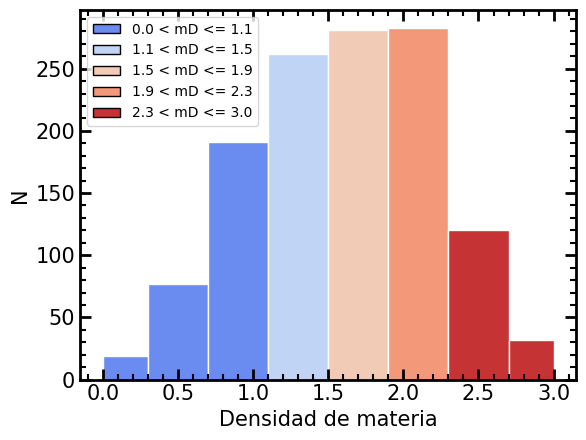

In [26]:
# Colores, niveles y etiquetas para las gráficas
cmap = plt.get_cmap('coolwarm')
colors = [cmap(0.15),cmap(0.4),cmap(0.6),cmap(0.75),cmap(0.95)]
bin_levels = [0.0,1.1,1.5,1.9,2.3,3.0]
labels = ['0.0 < mD <= 1.1','1.1 < mD <= 1.5','1.5 < mD <= 1.9','1.9 < mD <= 2.3','2.3 < mD <= 3.0']
Nbins = len(colors)

# Colores y niveles de bin para el histograma
hist_colors = [cmap(0.15),cmap(0.15),cmap(0.15),cmap(0.4),cmap(0.6),cmap(0.75),cmap(0.95),cmap(0.95)]
hist_levels = [0,0.3,0.7,1.1,1.5,1.9,2.3,2.7,3.0]

# Graficar histograma de densidad de materia en el Cúmulo de Coma
fig, ax = plt.subplots()
data = np.random.rand(1000)

N, bins, patches = ax.hist(evt_data['matterdens'][coma_ra&coma_dec&coma_z], edgecolor='white', linewidth=1,bins= hist_levels)

# Colorizar los bins del histograma según los niveles de densidad de materia
index = 0
for n in range(len(hist_levels)-1):
    for i in range(index,index+1):
        patches[i].set_facecolor(hist_colors[index])
        index += 1

ax.set_xlabel('Densidad de materia')
ax.set_ylabel('N')

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in colors]
plt.legend(handles, labels,fontsize=10)
plt.show()

Estos niveles de densidad de materia se eligieron para crear bins de tamaño aproximadamente similar. Desde aquí en adelante, "mD" representa "densidad de materia". 

A continuación, creamos máscaras para cada bin y aplicamos estas máscaras a nuestro data frame original para obtener cinco nuevos data frames del Cúmulo de Coma.  

In [27]:
# Crear máscaras para cada bin de densidad de materia
bin_masks = []
for i in range(Nbins):
    bin_mask = (evt_data['matterdens'] > bin_levels[i]) & (evt_data['matterdens'] <= bin_levels[i+1])
    bin_masks.append(bin_mask)

# Seleccionar fuentes para cada bin usando las máscaras
bins = []
for i in range(Nbins):
    coma_bin = evt_data[coma_ra&coma_dec&coma_z&bin_masks[i]].as_array()
    bins.append(coma_bin)
    print(f"Bin {i+1} contiene N= {len(bins[i])}")

Bin 1 contiene N= 287
Bin 2 contiene N= 262
Bin 3 contiene N= 281
Bin 4 contiene N= 283
Bin 5 contiene N= 152


Aquí, apilamos los espectros de todos los objetos en cada bin individualmente y agregamos las salidas apiladas (longitud de onda, flujo, modelo) a una lista.

In [30]:
# Inicializar listas de salida
wavelength_stacks = []
flux_stacks = []
model_stacks = []
med_matterdens = []

# Para cada bin, obtener la longitud de onda apilada, el flujo y el flujo modelado
for bin_name in (bins):
    specobjids_bin = bin_name['specobjid'].tolist()
    wavelength_out,flux_out = stack_spectra(specobjids_bin)
    wavelength_stacks.append(wavelength_out)
    flux_stacks.append(flux_out)
    med_matterdens.append(np.round(np.median(bin_name['matterdens']),3))


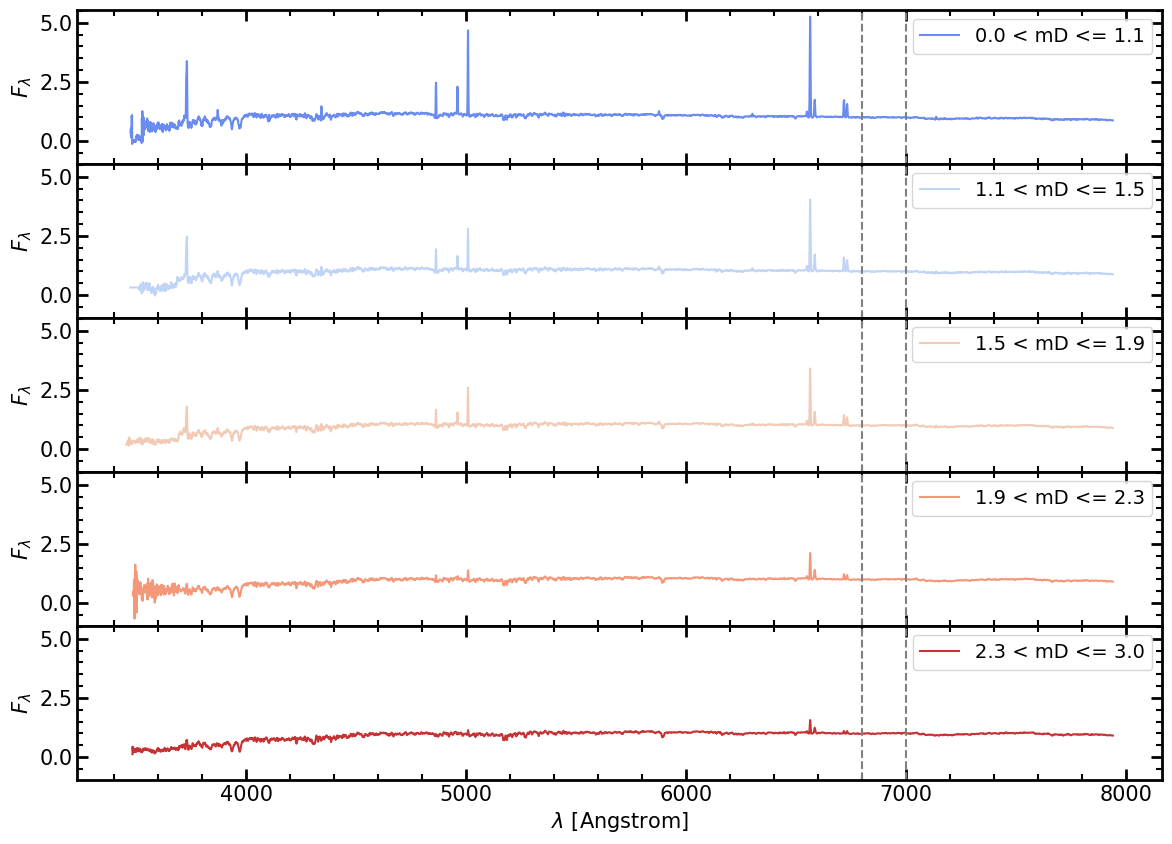

In [31]:
# Graficar espectros apilados de cada bin
fig, axs = plt.subplots(Nbins,1, figsize = (14, 10), sharex = True, sharey = True)
plt.subplots_adjust(wspace = 0., hspace = 0.)

# Bucle sobre cada bin y graficar un espectro apilado por panel
for i in range(Nbins):
    axs[i].plot(wavelength_stacks[i],flux_stacks[i],color=colors[i],label=labels[i])
    axs[i].legend(fontsize=14,loc='upper right')
    axs[i].set_ylabel('$F_{\lambda}$')

    # Sobreponer el rango donde la función de apilado normalizó por defecto
    axs[i].axvline(x=6800, ls='--', color='grey')
    axs[i].axvline(x=7000, ls='--', color='grey')

axs[Nbins-1].set_xlabel('$\lambda$ [Angstrom]')
plt.show()

La región entre las dos líneas verticales se usó para normalizar los espectros en la función de apilado. 

## El Continuo Estelar

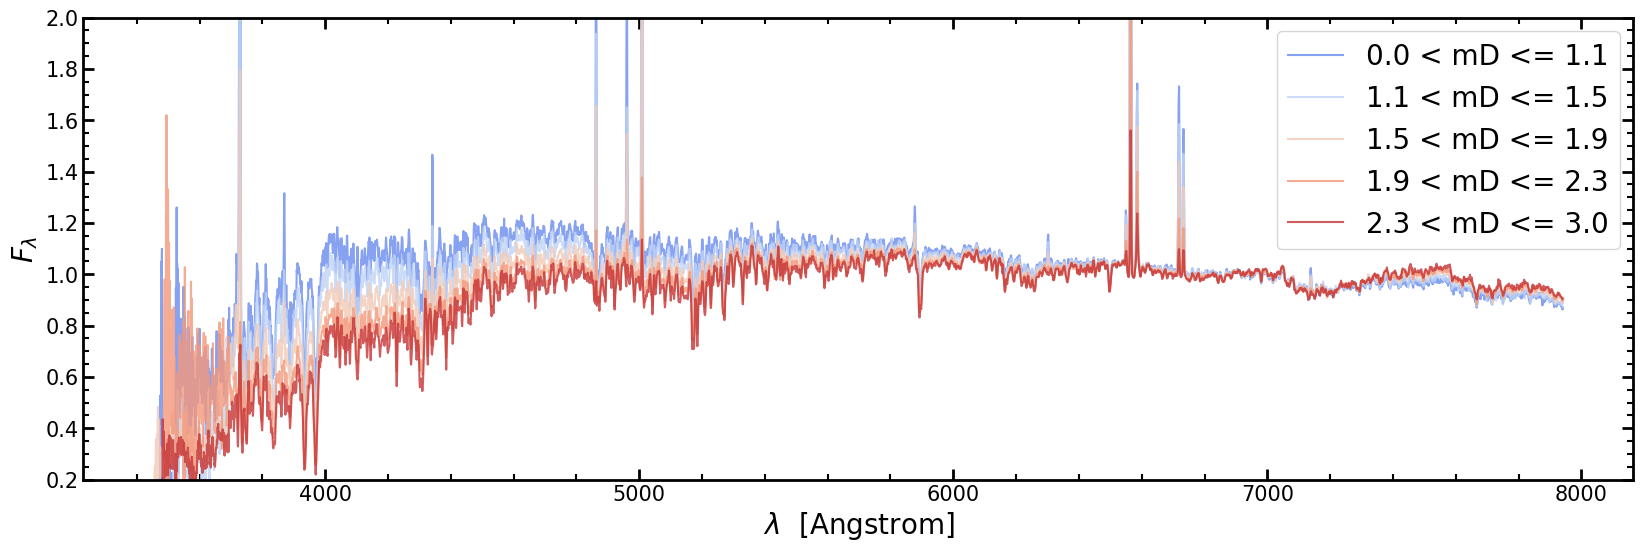

In [32]:
## Graficar los espectros en el mismo panel para comparar visualmente su forma general
fig, ax = plt.subplots(1,1, figsize = (20, 6), sharex = True, sharey = True)
plt.subplots_adjust(wspace = 0., hspace = 0.)

for i in range(Nbins):
    ax.plot(wavelength_stacks[i], flux_stacks[i], color = colors[i], label = labels[i],alpha=0.8)

ax.set_ylim(0.2,2)

ax.legend(fontsize = 20, loc = 'upper right')
ax.set_xlabel('$\lambda$  [Angstrom]',fontsize=20)
ax.set_ylabel('$F_{\lambda}$',fontsize=20);

A medida que la densidad de materia aumenta, la emisión continua de los espectros apilados cae más en longitudes de onda cortas; las galaxias en filamentos de alta densidad son más rojas. Esto es una indicación de una población estelar más vieja. Con esta normalización, las líneas de emisión (especialmente las del bin de menor densidad) se recortan para priorizar la visualización del continuo. Estas líneas de emisión se investigarán más adelante.  

## Salto de 4000$\mathring A$

El Salto de 4000Å es una caída abrupta en el espectro de una galaxia causada por la acumulación de líneas de absorción. Esta característica espectral se correlaciona con la formación estelar pasada ([Kriek et al. 2011](https://iopscience.iop.org/article/10.1088/0004-637X/743/2/168)), con saltos fuertes indicando que la galaxia no está formando actualmente una porción sustancial de su masa estelar. El índice Dn4000 se usa para cuantificar la fuerza del Salto de 4000Å. Se mide por la razón de los flujos de las regiones delimitadas por las líneas punteadas azules (3850 - 3950 $\mathring A$) y rojas (4000 - 4100 $\mathring A$) en la figura de abajo ([Balogh et al. 1999](https://iopscience.iop.org/article/10.1086/308056)). El salto de 4000$\mathring A$ puede ser un indicador de la edad estelar en una galaxia. 

In [33]:
# Normalizar espectros en la Región 2 de Dn4000
median_flux_4000 = np.zeros(Nbins)

for i in range(Nbins):
    r_wavelength_4000 = (wavelength_stacks[i] < 4100) & (wavelength_stacks[i] > 4000)
    median_flux_4000[i] = np.median(flux_stacks[i][r_wavelength_4000])

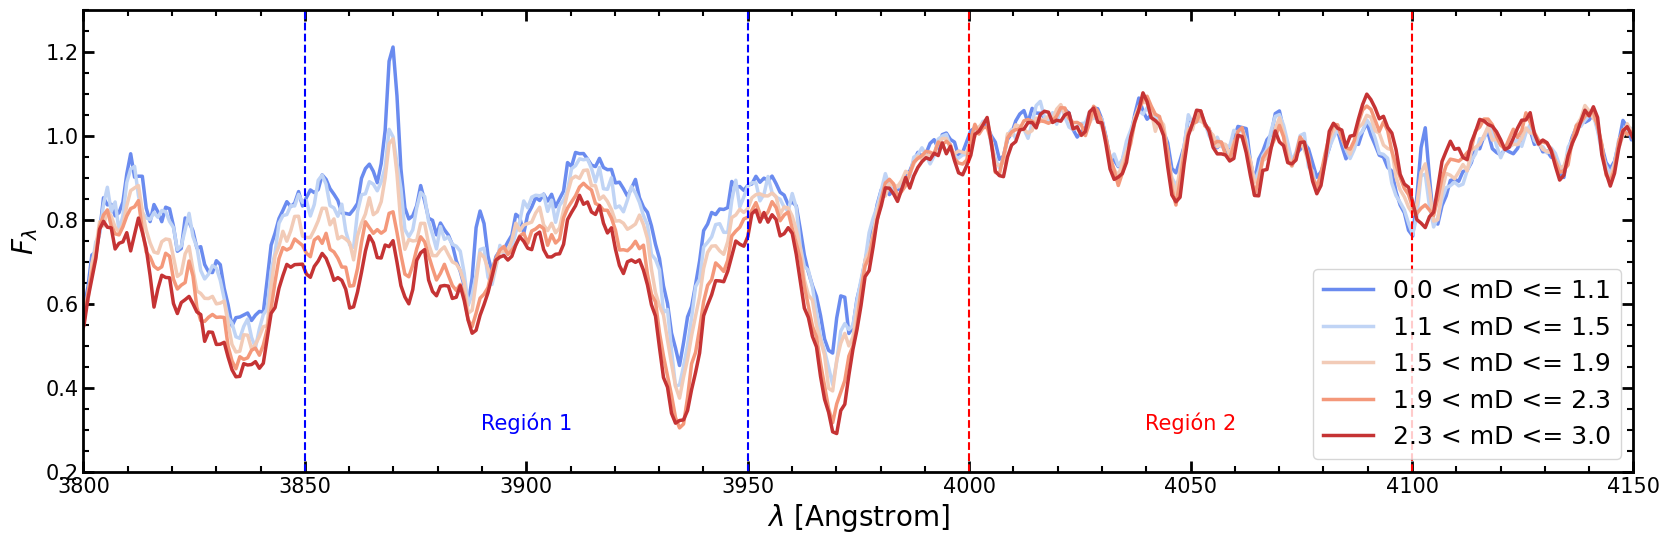

In [34]:
fig, ax = plt.subplots(1,1, figsize=(20, 6), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0., hspace=0.)

# Bucle sobre cada bin y sobreponer los espectros en el mismo panel
for i in range(Nbins):
    ax.plot(wavelength_stacks[i], flux_stacks[i]/median_flux_4000[i], color=colors[i], label=labels[i], alpha=1, lw=2.5)

ax.set_xlim(3800,4150)
ax.set_ylim(0.2,1.3)

# Región 1 del Dn4000
ax.axvline(x=3850, color='blue', linestyle='dashed')
ax.axvline(x=3950, color='blue', linestyle='dashed')
ax.text(3900,0.3, 'Región 1', ha='center', color='blue')

# Región 2 del Dn4000
ax.axvline(x=4000, color='red', linestyle='dashed')
ax.axvline(x=4100, color='red', linestyle='dashed')
ax.text(4050,0.3, 'Región 2', ha='center', color='red')

# Agregar leyenda y etiquetas de ejes
ax.legend(fontsize=18, loc='lower right')
ax.set_xlabel('$\lambda$ [Angstrom]', fontsize=20)
ax.set_ylabel('$F_{\lambda}$', fontsize=20);

Esta gráfica se enfoca en el salto de 4000$\mathring A$, normalizando en el rango rojo de Dn4000. Notamos visualmente que una mayor densidad de materia corresponde a un salto de 4000$\mathring A$ más significativo.

A continuación, calcularemos el índice Dn4000 tomando la razón de la densidad de flujo ($f_{\nu}$) en la Región 2 y la Región 1 para cuantificar esta observación. 

### Cálculo del Índice Dn4000

In [35]:
# Calcular la densidad de flujo en frecuencia (f_nu) para cada uno de los bins de densidad de materia
c = (3e8)*(1e10) # Velocidad de la luz en angstrom/segundo

flux_nu_stacks = []

# Para cada bin, obtener la densidad de flujo (f_nu)
for i in range(Nbins):
    fnu_out = (flux_stacks[i]*1e-17)*((wavelength_stacks[i])**2/c)
    flux_nu_stacks.append(fnu_out)

In [36]:
Dn4000s = []

# Para cada bin, calcular el índice Dn4000
for i in range(Nbins):

    wl = wavelength_stacks[i]
    fnu = flux_nu_stacks[i]
    
    # Definir máscaras de región roja y azul para calcular el índice Dn4000 de cada uno de los bins de densidad de materia
    region1_mask = (wl < 3950) & (wl > 3850) # Máscara de Región 1
    region2_mask = (wl < 4100) & (wl > 4000) # Máscara de Región 2

    # Para integrar el flujo debemos conocer el ancho de cada elemento del espectro
    Nwl = len(wl)
    widths = np.zeros(Nwl)
    # Usar la diferencia entre el siguiente elemento y el actual hasta Nwl-2
    widths[:Nwl-2] = wl[1:Nwl-1] - wl[:Nwl-2]
    # Insertar el mismo valor que el penúltimo bin para el último bin
    widths[Nwl-1] += widths[Nwl-2]

    # Integrar flujo en las Regiones 1 y 2 usando sumas de Riemann por la derecha
    region1_flux_bin = np.sum(fnu[region1_mask]*widths[region1_mask])
    region2_flux_bin = np.sum(fnu[region2_mask]*widths[region2_mask])    

    # Tomar la razón de flujos de la Región 1 y 2 para cada bin de densidad de materia, redondeando a 3 decimales
    Dn4000_bin = np.round(region2_flux_bin/region1_flux_bin, 3)
    Dn4000s.append(Dn4000_bin)

In [37]:
# Calcular el ancho del bin de densidad de materia relativo al valor mediano en cada bin 
# (para graficarlos como barras de error inferiores (lo) y superiores (up) más abajo)
xerr_lo = []
xerr_up = []

for i in range(Nbins):
    xwidth_lo = np.round(med_matterdens[i] - bin_levels[i], 4)   # Redondeado a 4 decimales
    xwidth_up = np.round(bin_levels[i+1] - med_matterdens[i], 4)
    xerr_lo.append(xwidth_lo)
    xerr_up.append(xwidth_up)

# “Error” en densidad de materia calculado encontrando el ancho de bin inferior y superior relativo al 
# valor mediano de densidad de materia de cada bin
xerr = np.array([xerr_lo, xerr_up])

Text(0.5, 0, 'log(Densidad de Materia)')

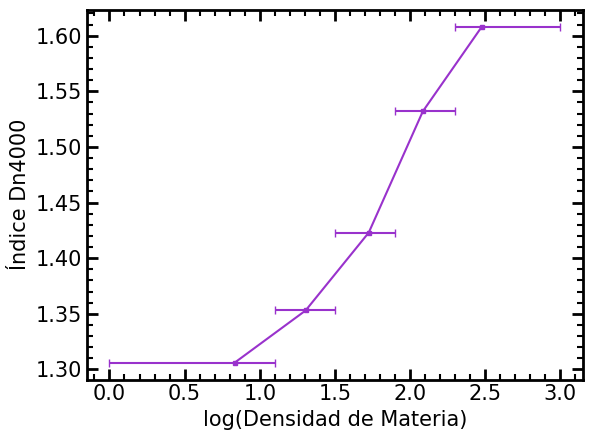

In [38]:
# Graficar índice Dn4000 como función de la densidad local de materia de cada bin
plt.errorbar(med_matterdens,Dn4000s,xerr=xerr,capsize=3,marker='s',markersize=3,color='darkorchid')
plt.ylabel('Índice Dn4000')
plt.xlabel('log(Densidad de Materia)')

Tomamos el valor mediano de la densidad de materia para cada bin.  
A medida que aumenta la densidad de materia, también lo hace la intensidad del salto de 4000Å, otro indicador de poblaciones estelares más antiguas para galaxias en regiones de alta densidad.  
Estas poblaciones estelares viejas son señal de galaxias apagadas (*quenched*), ya que las estrellas jóvenes mueren y las viejas estrellas rojas dominan.

## Líneas de Emisión

Las líneas de emisión como las de Balmer (H$\alpha$, H$\beta$, etc.) y las líneas prohibidas (p. ej., [OIII]4959,5007) pueden usarse como trazadores de formación estelar y actividad de acreción de agujeros negros en una galaxia.  
Examinamos algunas líneas de emisión fuertes típicas en bins de densidad ambiental creciente.

In [39]:
# Normalizar espectros en regiones cercanas a las líneas de emisión OIII y H-alfa 
median_flux_OIII = np.zeros(Nbins)

median_flux_Ha = np.zeros(Nbins)

for i in range(Nbins):
    r_wavelength_OIII = (wavelength_stacks[i] < 4950) & (wavelength_stacks[i] > 4880)
    median_flux_OIII[i] = np.median(flux_stacks[i][r_wavelength_OIII])

    r_wavelength_Ha = (wavelength_stacks[i] < 6700) & (wavelength_stacks[i] > 6630)
    median_flux_Ha[i] = np.median(flux_stacks[i][r_wavelength_Ha])

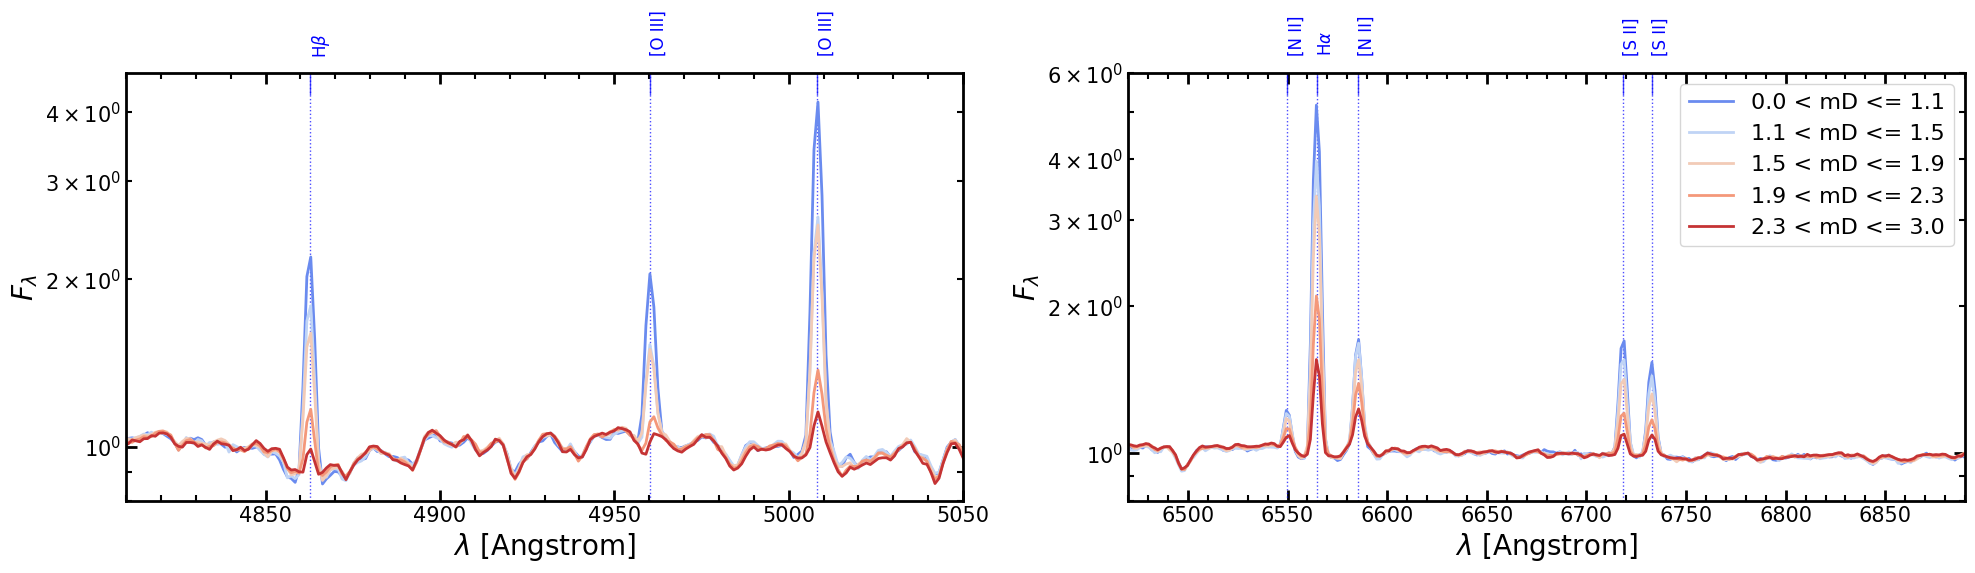

In [40]:
# Inicializar la figura con dos paneles
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex='col')
plt.subplots_adjust(wspace = 0.14, hspace=0.0)

# Primera ventana espectral para cubrir Hb, [OIII]4959,5007 en marco de reposo
axs[0].set_xlim(4810, 5050)
axs[0].set_ylim(0.8, 4.7)

# Segunda ventana espectral para cubrir Ha, [NII]6548,6584 y [SII]6717,6731 en marco de reposo
axs[1].set_xlim(6470, 6890)
axs[1].set_ylim(0.8, 6)

# Sobreponer líneas verticales en la ubicación de las líneas de emisión esperadas
add_lines(ax=axs[0], z=0, abs_lines=[])
add_lines(ax=axs[1], z=0, abs_lines=[])

# Bucle sobre los bins y sobreponer el espectro apilado de cada bin en ambas ventanas espectrales
for i in range(Nbins):
    axs[0].plot(wavelength_stacks[i], flux_stacks[i]/median_flux_OIII[i], color=colors[i], label=labels[i], alpha=1, lw=2)
    axs[1].plot(wavelength_stacks[i], flux_stacks[i]/median_flux_Ha[i], color=colors[i], label=labels[i], alpha=1, lw=2)

# Usar escala logarítmica para la densidad de flujo para mostrar todo el rango de las líneas de emisión
# y también ver detalles de la forma del continuo (normalizado)
axs[0].set_yscale('log')
axs[1].set_yscale('log')

# Etiquetar ejes
axs[0].set_xlabel('$\lambda$ [Angstrom]', fontsize=20)
axs[0].set_ylabel('$F_{\lambda}$', fontsize=20)
axs[1].set_xlabel('$\lambda$ [Angstrom]', fontsize=20)
axs[1].set_ylabel('$F_{\lambda}$', fontsize=20);

# Agregar leyenda al segundo panel
axs[1].legend(fontsize=16, loc='upper right')

plt.tight_layout()

De la figura anterior, podemos inferir lo siguiente:  
   * En general, todas las líneas de emisión son más fuertes en regiones de baja densidad (espectro azul) y su intensidad disminuye con el aumento de la densidad de materia.  
   * La línea H$\alpha$ es un trazador de formación estelar. Se ve más intensa en galaxias en regiones o filamentos de baja densidad.  
   * La línea [OIII]$\lambda$5007 (y la línea doble asociada en 4959 Å) es luminosa ya sea por gas ionizado de baja metalicidad o por la presencia de un AGN, pero considerar esta línea sola no permite identificar la fuente principal de ionización.  
   * La fuente principal de ionización podría determinarse investigando las razones entre líneas de emisión y usando el diagrama diagnóstico BPT (como se muestra en el notebook [01_GalaxiasLineasEm_EspectrosApilados](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GalaxiasConLineasDeEmision/01_GalaxiasLineasEm_EspectrosApilados.ipynb))  
   * En general, cuanto mayor es la densidad de materia, más débiles son las líneas de emisión. Esto podría ser un indicador de muy baja formación estelar y/o actividad de AGN.

<a class="anchor" id="references"></a>
# Referencias
  
- [Balogh et al. 1999](https://iopscience.iop.org/article/10.1086/308056), ApJ 527, 54
- [Elek et al. 2022](https://direct.mit.edu/artl/article/28/1/22/108680/Monte-Carlo-Physarum-Machine-Characteristics-of), Artificial Life 28, 22
- [Kriek et al. 2011](https://iopscience.iop.org/article/10.1088/0004-637X/743/2/168), ApJ 743, 168
- [Rines et al. 2005](https://iopscience.iop.org/article/10.1086/433173), AJ 130, 1482
- [Tiwari et al. 2020](https://ui.adsabs.harvard.edu/abs/2020NewA...8101417T/abstract), New Astronomy 81, 101417
- [Wilde et al. 2023](https://ui.adsabs.harvard.edu/abs/2023arXiv230102719W/abstract), arXiv:2301.02719